In [10]:
import pandas as pd

file_path = 'character_list5.csv'

encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("File successfully read with encoding:", encoding)
        break  
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)
        continue

Error reading file with encoding: utf-8
Error reading file with encoding: utf-8-sig
File successfully read with encoding: latin-1


In [11]:
cleaned_list = df.dropna()
cleaned_list

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
5,280,michael johnson,723,m,38.0
6,280,robert kincaid,1908,m,65.0
...,...,...,...,...,...
23043,9254,lumiere,1063,m,56.0
23044,9254,maurice,1107,m,71.0
23045,9254,monsieur d'arqu,114,m,58.0
23046,9254,mrs. potts,564,f,66.0


In [12]:
file_path = 'character_mapping.csv'

encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df2 = pd.read_csv(file_path, encoding=encoding)
        print("File successfully read with encoding:", encoding)
        break  
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)
        continue 

Error reading file with encoding: utf-8
Error reading file with encoding: utf-8-sig
File successfully read with encoding: latin-1


In [14]:
cleaned_mapping = df2.dropna()
cleaned_mapping

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466
...,...,...,...,...,...
99384,9254,tt0101414,lefou,lefou,nm0181425
99385,9254,tt0101414,lumiere,lumiere,nm0001583
99386,9254,tt0101414,maurice,maurice,nm0263591
99387,9254,tt0101414,mrs potts,mrs. potts,nm0001450


In [15]:
file_path = 'meta_data7.csv'

encodings = ['utf-8', 'utf-8-sig', 'latin-1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df3 = pd.read_csv(file_path, encoding=encoding)
        print("File successfully read with encoding:", encoding)
        break  
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)
        continue 

Error reading file with encoding: utf-8
Error reading file with encoding: utf-8-sig
File successfully read with encoding: latin-1


In [17]:
cleaned_meta = df3.dropna()
cleaned_meta

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340
5,6537,tt0450385,1408,2007,91.0,37677777777777777776777737566646444336777661
...,...,...,...,...,...,...
1994,5517,tt3312830,Youth,2015,2.0,7777777743477777777777777777777654336667757777...
1995,3765,tt0403702,Youth in Revolt,2009,17.0,7766777656545344243247443314443342644634343374...
1996,3766,tt1790885,Zero Dark Thirty,2012,104.0,5677677556654467677515744741445336433333000120...
1997,8158,tt0120906,Zero Effect,1998,3.0,4777774477777647777777777755677755423677777777...


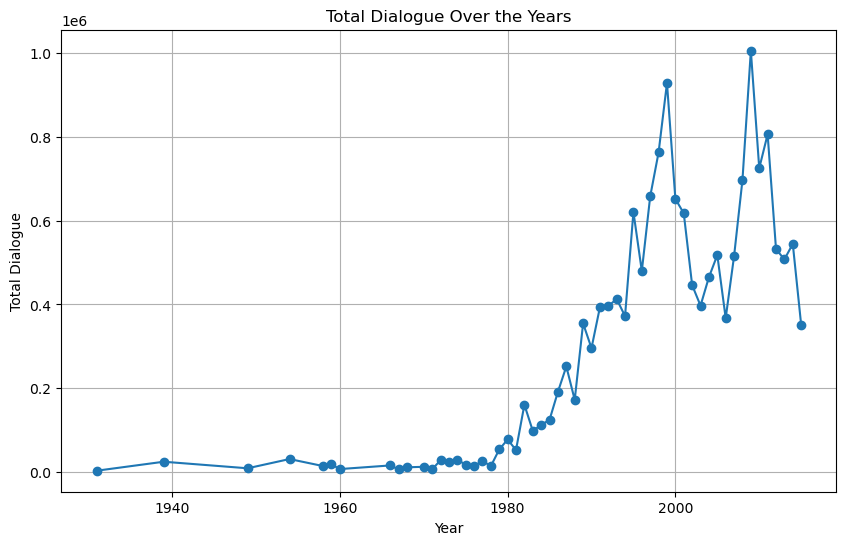

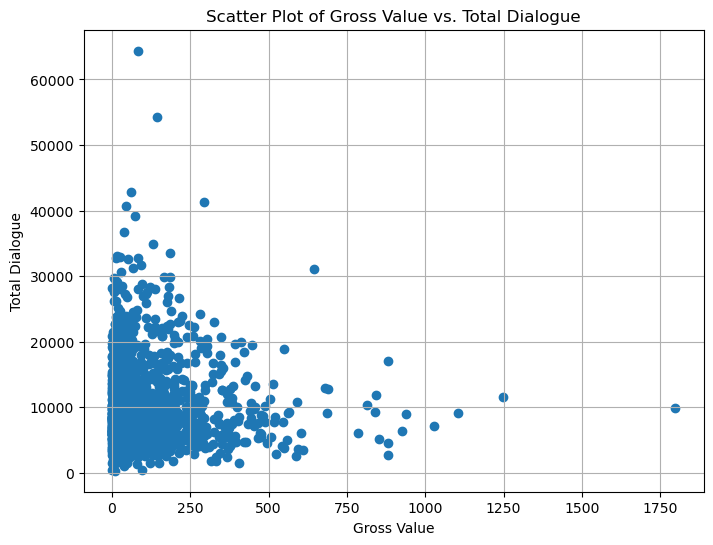

Correlation between gross value and total dialogue: -0.0029447568882783387


In [21]:
# Merge character_list with meta_data
merged_data = pd.merge(cleaned_list, cleaned_meta, on='script_id')

# Calculate total dialogue spoken in each movie
total_dialogue_per_movie = merged_data.groupby('title')['words'].sum().reset_index()

# Group data by year and calculate total dialogue spoken in each year
total_dialogue_per_year = merged_data.groupby('year')['words'].sum().reset_index()

# Plotting total dialogue over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(total_dialogue_per_year['year'], total_dialogue_per_year['words'], marker='o')
plt.title('Total Dialogue Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Dialogue')
plt.grid(True)
plt.show()

# Assessing breakdown of gender dialogue over time
gender_dialogue_per_year = merged_data.groupby(['year', 'gender'])['words'].sum().unstack(fill_value=0)

# Calculating proportion of words spoken by each gender in each movie
merged_data['total_words'] = merged_data.groupby('title')['words'].transform('sum')
merged_data['gender_proportion'] = merged_data['words'] / merged_data['total_words']

# Testing relationship between film’s gross value and amount of dialogue
# Merge character_list with meta_data
merged_data = pd.merge(cleaned_list, cleaned_meta, on='script_id')

# Calculate total dialogue spoken in each movie
total_dialogue_per_movie = merged_data.groupby('title')['words'].sum().reset_index()

# Merge total_dialogue_per_movie with meta_data on title
merged_data = pd.merge(total_dialogue_per_movie, cleaned_meta, on='title')

# Analyze correlation between gross value and total dialogue
correlation = merged_data['gross'].corr(merged_data['words'])

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['gross'], merged_data['words'])
plt.title('Scatter Plot of Gross Value vs. Total Dialogue')
plt.xlabel('Gross Value')
plt.ylabel('Total Dialogue')
plt.grid(True)
plt.show()

print("Correlation between gross value and total dialogue:", correlation)